# Imports

In [14]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [15]:
n = 6
label_name = "stat4"
layers = [2]
epochs = 5000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [16]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [17]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.967080354690552
Epoch 1, Loss 6.928129553794861
Epoch 2, Loss 6.877529323101044
Epoch 3, Loss 6.8143420815467834
Epoch 4, Loss 6.753946006298065
Epoch 5, Loss 6.694474518299103
Epoch 6, Loss 6.634788155555725
Epoch 7, Loss 6.575578272342682
Epoch 8, Loss 6.519167125225067
Epoch 9, Loss 6.4605026841163635
Epoch 10, Loss 6.408899903297424
Epoch 11, Loss 6.3488330245018005
Epoch 12, Loss 6.295719861984253
Epoch 13, Loss 6.244634807109833
Epoch 14, Loss 6.193251073360443
Epoch 15, Loss 6.142584800720215
Epoch 16, Loss 6.0905721783638
Epoch 17, Loss 6.040028154850006
Epoch 18, Loss 5.990667223930359
Epoch 19, Loss 5.945913076400757
Epoch 20, Loss 5.900445222854614
Epoch 21, Loss 5.852078437805176
Epoch 22, Loss 5.806651711463928
Epoch 23, Loss 5.763108313083649
Epoch 24, Loss 5.719049632549286
Epoch 25, Loss 5.67630922794342
Epoch 26, Loss 5.6339868903160095
Epoch 27, Loss 5.591640770435333
Epoch 28, Loss 5.548773527145386
Epoch 29, Loss 5.510604500770569
Epoch 30, Loss 5.47

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

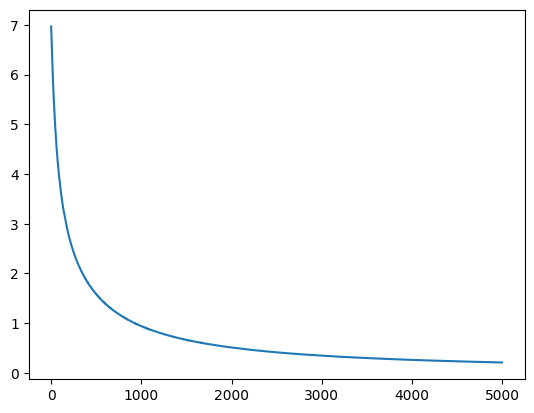

In [18]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

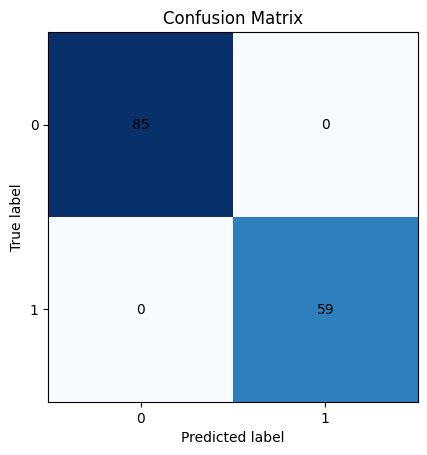

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [19]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

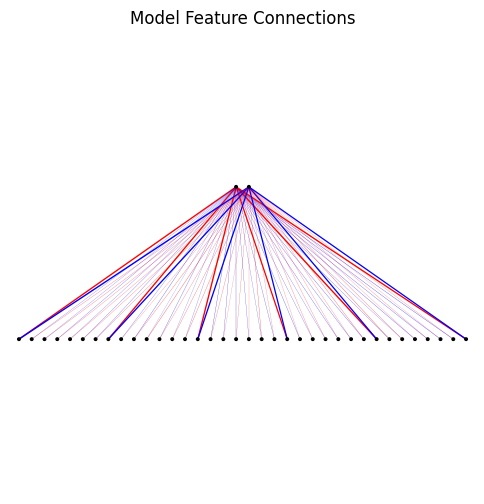

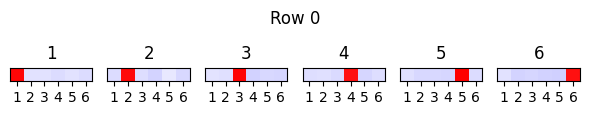

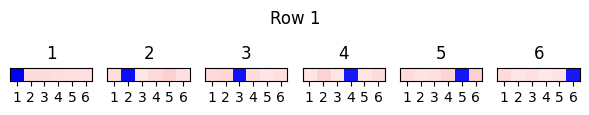

In [20]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)